# 感知机的朴素实现

In [1]:
import numpy as np

class Perceptron:
    def __init__(self):
        self._w = self._b = None
        
    def fit(self, x, y, lr=0.01, epoch=1000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            err = -y * self.predict(x, True)
            idx = np.argmax(err)
            if err[idx] < 0:
                break
            delta = lr * y[idx]
            self._w += delta * x[idx]
            self._b += delta
    
    def predict(self, x, raw=False):
        x = np.asarray(x, np.float32)
        y_pred = x.dot(self._w) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)

## 测试

In [2]:
from Util import gen_two_clusters

x, y = gen_two_clusters()
perceptron = Perceptron()
perceptron.fit(x, y)
print("准确率：{:8.6} %".format((perceptron.predict(x) == y).mean() * 100))

准确率：    99.0 %


## 可视化

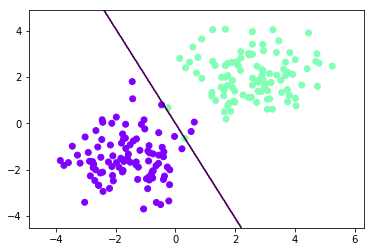

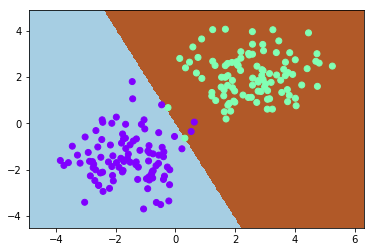

In [3]:
from Util import visualize2d

visualize2d(perceptron, x, y)
visualize2d(perceptron, x, y, True)

### 可视化训练过程

+ 实现思路如下：
    + 在每一步迭代时生成一张如上所示的图像
    + 在最后调用相应的第三方库（`imageio`）、将生成的所有图像合成一个 mp4
    + 用`ffmpeg`将 mp4 转为方便分享的 gif

![perceptron](https://cdn.rawgit.com/carefree0910/Resources/cbd5675e/Lines/Perceptron.gif)

![perceptron](https://cdn.rawgit.com/carefree0910/Resources/cbd5675e/Backgrounds/Perceptron.gif)